In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import weightedcalcs as wc
import geopandas
import descartes

In [2]:
df = pd.read_csv('Data/usa_00003.csv')

In [3]:
df["INCTOT"].replace({9999999: np.nan}, inplace=True) #removing coded variable for no income information

In [4]:
df1 = df[df['INCTOT'].notna()]
df1

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,200901,816419,89,150.0,2009008164191,13,810,4101,410136,...,0,2,5,2,1,2,1,10,3800.0,33
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000.0,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0.0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0.0,93
5,2009,200901,816465,717,85.0,2009008164651,13,810,4103,410336,...,0,3,3,1,1,2,3,30,0.0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237138,2019,201901,923317,2019001412249,56.0,2019009233171,13,610,3803,380336,...,200,0,5,1,1,2,3,30,13300.0,101
237140,2019,201901,923323,2019001412338,161.0,2019009233231,13,470,4010,401036,...,0,2,5,1,1,2,3,30,8800.0,72
237141,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,3,30,16200.0,53
237142,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,3,30,0.0,53


In [5]:
calc = wc.Calculator("PERWT") # code to help create the weighted variables

In [6]:
puma = df1.groupby(['YEAR', 'COUNTYICP', 'PUMA'], as_index=False)

In [7]:
PUMA = calc.mean(puma, 'INCTOT').reset_index()
nyc_acs = PUMA.rename(columns={None: 'AVGINC'})
nyc_acs

,index,YEAR,COUNTYICP,PUMA,AVGINC
0,0,2009,50,3701,8366.656996
1,1,2009,50,3702,9328.643894
2,2,2009,50,3703,9649.703559
3,3,2009,50,3704,11809.218087
4,4,2009,50,3705,8204.926644
...,...,...,...,...,...
600,600,2019,810,4113,19133.717842
601,601,2019,810,4114,14192.810042
602,602,2019,850,3901,19495.843237
603,603,2019,850,3902,18042.498568


In [40]:
nyc_sorted = nyc_acs.sort_values(by=['YEAR', 'PUMA'])

In [9]:
# url of our shape file 
path="/Users/Ariel/Desktop/"
# load the shape file using geopandas
geo = geopandas.read_file(path+'ipums_puma_2010')

AttributeError: 'GeoDataFrame' object has no attribute 'longitude'

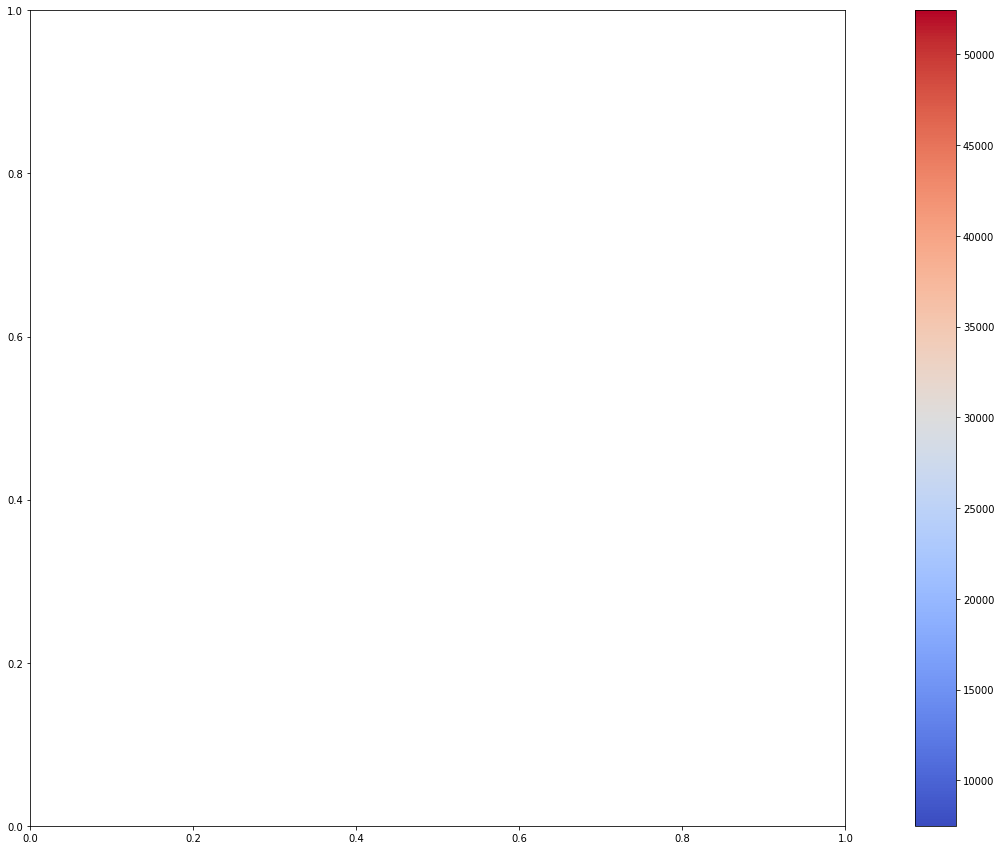

In [33]:
# merge nyc_acs data and geo_nyc shapefile
map_nyc = [geo_nyc, nyc_acs]
geo_merge=pd.concat(map_nyc)
# plot USA map 
geo_merge.plot(column='AVGINC', figsize=(25, 15),legend=True,cmap='coolwarm')
# add countries names and numbers 
for i in range(len(geo_merge)):
    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.PUMA[i],geo_merge.AVGINC[i]),size=10)
plt.title('Average Income Across NYC',fontsize=25)
plt.show()

In [34]:
geo_merge

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry,index,YEAR,COUNTYICP,AVGINC
1759,3603810.0,G36003810,3603810,36,New York,3810,NYC-Manhattan Community District 1 & 2--Batter...,"MULTIPOLYGON (((1823808.440 568954.625, 182379...",NaN,NaN,NaN,NaN
1760,3603807.0,G36003807,3603807,36,New York,3807,NYC-Manhattan Community District 4 & 5--Chelse...,"POLYGON ((1825753.088 579102.729, 1825796.020 ...",NaN,NaN,NaN,NaN
1761,3603806.0,G36003806,3603806,36,New York,3806,NYC-Manhattan Community District 7--Upper West...,"POLYGON ((1827943.088 582810.176, 1827980.436 ...",NaN,NaN,NaN,NaN
1762,3603802.0,G36003802,3603802,36,New York,3802,NYC-Manhattan Community District 9--Hamilton H...,"POLYGON ((1828642.709 586408.146, 1828692.595 ...",NaN,NaN,NaN,NaN
1763,3603801.0,G36003801,3603801,36,New York,3801,NYC-Manhattan Community District 12--Washingto...,"MULTIPOLYGON (((1828941.161 591795.002, 182894...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
600,NaN,NaN,NaN,NaN,NaN,4113,NaN,None,600.0,2019.0,810.0,19133.717842
601,NaN,NaN,NaN,NaN,NaN,4114,NaN,None,601.0,2019.0,810.0,14192.810042
602,NaN,NaN,NaN,NaN,NaN,3901,NaN,None,602.0,2019.0,850.0,19495.843237
603,NaN,NaN,NaN,NaN,NaN,3902,NaN,None,603.0,2019.0,850.0,18042.498568


In [10]:
geo = geopandas.read_file(path+'ipums_puma_2010')
geo

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
0,600105,G06000105,0600105,06,California,00105,"Alameda County (West)--San Leandro, Alameda & ...","MULTIPOLYGON (((-2258646.530 342733.341, -2258..."
1,600102,G06000102,0600102,06,California,00102,Alameda County (Northwest)--Oakland (Northwest...,"POLYGON ((-2259099.372 353383.127, -2259101.40..."
2,608502,G06008502,0608502,06,California,08502,Santa Clara County (Northwest)--Sunnyvale & Sa...,"POLYGON ((-2246220.131 304622.390, -2246216.04..."
3,600108,G06000108,0600108,06,California,00108,"Alameda County (Southwest)--Union City, Newark...","MULTIPOLYGON (((-2247215.331 305414.315, -2247..."
4,600107,G06000107,0600107,06,California,00107,Alameda County (Central)--Hayward City PUMA,"POLYGON ((-2244205.948 331582.334, -2244209.13..."
...,...,...,...,...,...,...,...,...
2373,4700500,G47000500,4700500,47,Tennessee,00500,Sumner County--Hendersonville City PUMA,"POLYGON ((866114.245 -51743.712, 866113.249 -5..."
2374,4702501,G47002501,4702501,47,Tennessee,02501,Nashville-Davidson (East) PUMA,"MULTIPOLYGON (((843851.300 -110459.794, 843847..."
2375,5310400,G53010400,5310400,53,Washington,10400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...","POLYGON ((-1820226.155 1520836.039, -1819540.5..."
2376,5310300,G53010300,5310300,53,Washington,10300,Chelan & Douglas Counties PUMA,"POLYGON ((-1833489.407 1472988.079, -1833401.9..."


In [12]:
geo_ny = geo[geo['State'].str.contains('New York')]
geo_ny

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1754,3600200,G36000200,3600200,36,New York,00200,"Clinton, Franklin, Essex & Hamilton Counties PUMA","POLYGON ((1788883.762 971525.262, 1788855.569 ..."
1755,3602701,G36002701,3602701,36,New York,02701,Sullivan & Ulster (West) Counties PUMA,"POLYGON ((1785274.984 721789.832, 1786755.402 ..."
1756,3602702,G36002702,3602702,36,New York,02702,Ulster County (East) PUMA,"POLYGON ((1797341.583 722587.160, 1797345.789 ..."
1757,3602401,G36002401,3602401,36,New York,02401,Chemung (South) & Steuben (East) Counties--Gre...,"POLYGON ((1585190.990 681513.174, 1585550.866 ..."
1758,3602402,G36002402,3602402,36,New York,02402,"Steuben (North & West), Schuyler & Chemung (No...","POLYGON ((1583461.316 698344.475, 1583498.175 ..."
...,...,...,...,...,...,...,...,...
1894,3604113,G36004113,3604113,36,New York,04113,NYC-Queens Community District 10--Howard Beach...,"MULTIPOLYGON (((1839894.381 568619.343, 184007..."
1895,3604105,G36004105,3604105,36,New York,04105,NYC-Queens Community District 13--Queens Villa...,"POLYGON ((1850071.725 582540.241, 1850125.682 ..."
1896,3604104,G36004104,3604104,36,New York,04104,"NYC-Queens Community District 11--Bayside, Dou...","POLYGON ((1845681.605 584698.889, 1845720.329 ..."
1897,3604103,G36004103,3604103,36,New York,04103,"NYC-Queens Community District 7--Flushing, Mur...","POLYGON ((1844077.040 584102.979, 1844003.635 ..."


In [13]:
geo_nyc = geo_ny[geo_ny['Name'].str.contains('NYC')]
geo_nyc

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1759,3603810,G36003810,3603810,36,New York,03810,NYC-Manhattan Community District 1 & 2--Batter...,"MULTIPOLYGON (((1823808.440 568954.625, 182379..."
1760,3603807,G36003807,3603807,36,New York,03807,NYC-Manhattan Community District 4 & 5--Chelse...,"POLYGON ((1825753.088 579102.729, 1825796.020 ..."
1761,3603806,G36003806,3603806,36,New York,03806,NYC-Manhattan Community District 7--Upper West...,"POLYGON ((1827943.088 582810.176, 1827980.436 ..."
1762,3603802,G36003802,3603802,36,New York,03802,NYC-Manhattan Community District 9--Hamilton H...,"POLYGON ((1828642.709 586408.146, 1828692.595 ..."
1763,3603801,G36003801,3603801,36,New York,03801,NYC-Manhattan Community District 12--Washingto...,"MULTIPOLYGON (((1828941.161 591795.002, 182894..."
1764,3603803,G36003803,3603803,36,New York,03803,NYC-Manhattan Community District 10--Central H...,"POLYGON ((1829476.573 585349.807, 1829399.851 ..."
1765,3603809,G36003809,3603809,36,New York,03809,NYC-Manhattan Community District 3--Chinatown ...,"MULTIPOLYGON (((1827845.437 571805.204, 182801..."
1766,3603805,G36003805,3603805,36,New York,03805,NYC-Manhattan Community District 8--Upper East...,"MULTIPOLYGON (((1829090.984 577328.245, 182898..."
1767,3603804,G36003804,3603804,36,New York,03804,NYC-Manhattan Community District 11--East Harl...,"MULTIPOLYGON (((1831633.068 582698.078, 183148..."
1768,3603808,G36003808,3603808,36,New York,03808,NYC-Manhattan Community District 6--Murray Hil...,"POLYGON ((1829002.194 578178.863, 1828976.622 ..."


In [26]:
geo_nyc.shape

(55, 8)

<AxesSubplot:>

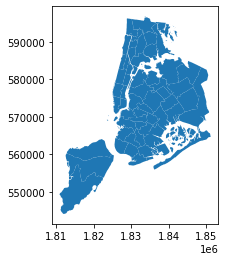

In [12]:
geo_nyc.plot()

In [13]:
geo_nyc.columns

Index(['GISMATCH', 'GISJOIN', 'GEOID', 'STATEFIP', 'State', 'PUMA', 'Name',
       'geometry'],
      dtype='object')

In [14]:
geo_nyc['PUMA'] = geo_nyc['PUMA'].apply(lambda x: int(str(x)[1:]))

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [15]:
geo_nyc

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1759,3603810,G36003810,3603810,36,New York,3810,NYC-Manhattan Community District 1 & 2--Batter...,"MULTIPOLYGON (((1823808.440 568954.625, 182379..."
1760,3603807,G36003807,3603807,36,New York,3807,NYC-Manhattan Community District 4 & 5--Chelse...,"POLYGON ((1825753.088 579102.729, 1825796.020 ..."
1761,3603806,G36003806,3603806,36,New York,3806,NYC-Manhattan Community District 7--Upper West...,"POLYGON ((1827943.088 582810.176, 1827980.436 ..."
1762,3603802,G36003802,3603802,36,New York,3802,NYC-Manhattan Community District 9--Hamilton H...,"POLYGON ((1828642.709 586408.146, 1828692.595 ..."
1763,3603801,G36003801,3603801,36,New York,3801,NYC-Manhattan Community District 12--Washingto...,"MULTIPOLYGON (((1828941.161 591795.002, 182894..."
1764,3603803,G36003803,3603803,36,New York,3803,NYC-Manhattan Community District 10--Central H...,"POLYGON ((1829476.573 585349.807, 1829399.851 ..."
1765,3603809,G36003809,3603809,36,New York,3809,NYC-Manhattan Community District 3--Chinatown ...,"MULTIPOLYGON (((1827845.437 571805.204, 182801..."
1766,3603805,G36003805,3603805,36,New York,3805,NYC-Manhattan Community District 8--Upper East...,"MULTIPOLYGON (((1829090.984 577328.245, 182898..."
1767,3603804,G36003804,3603804,36,New York,3804,NYC-Manhattan Community District 11--East Harl...,"MULTIPOLYGON (((1831633.068 582698.078, 183148..."
1768,3603808,G36003808,3603808,36,New York,3808,NYC-Manhattan Community District 6--Murray Hil...,"POLYGON ((1829002.194 578178.863, 1828976.622 ..."


In [38]:
gnyc_sorted = geo_nyc.sort_values(by=['PUMA'])

In [39]:
n_years = 11

In [31]:
gnyc_sorted_copy = gnyc_sorted.copy()
for i in range(n_years):

In [46]:
gnyc_1 = pd.merge(gnyc_sorted, nyc_sorted, how='inner', on = 'PUMA')

In [47]:
gnyc_1

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry,index,YEAR,COUNTYICP,AVGINC
0,3603701,G36003701,3603701,36,New York,3701,"NYC-Bronx Community District 8--Riverdale, Fie...","POLYGON ((1830096.873 596066.768, 1830100.137 ...",0,2009,50,8366.656996
1,3603701,G36003701,3603701,36,New York,3701,"NYC-Bronx Community District 8--Riverdale, Fie...","POLYGON ((1830096.873 596066.768, 1830100.137 ...",55,2010,50,10383.943193
2,3603701,G36003701,3603701,36,New York,3701,"NYC-Bronx Community District 8--Riverdale, Fie...","POLYGON ((1830096.873 596066.768, 1830100.137 ...",110,2011,50,11555.988933
3,3603701,G36003701,3603701,36,New York,3701,"NYC-Bronx Community District 8--Riverdale, Fie...","POLYGON ((1830096.873 596066.768, 1830100.137 ...",165,2012,50,9938.415995
4,3603701,G36003701,3603701,36,New York,3701,"NYC-Bronx Community District 8--Riverdale, Fie...","POLYGON ((1830096.873 596066.768, 1830100.137 ...",220,2013,50,10039.126992
...,...,...,...,...,...,...,...,...,...,...,...,...
600,3604114,G36004114,3604114,36,New York,4114,NYC-Queens Community District 14--Far Rockaway...,"MULTIPOLYGON (((1843073.321 562774.065, 184335...",381,2015,810,13535.294790
601,3604114,G36004114,3604114,36,New York,4114,NYC-Queens Community District 14--Far Rockaway...,"MULTIPOLYGON (((1843073.321 562774.065, 184335...",436,2016,810,15465.468594
602,3604114,G36004114,3604114,36,New York,4114,NYC-Queens Community District 14--Far Rockaway...,"MULTIPOLYGON (((1843073.321 562774.065, 184335...",491,2017,810,15725.458681
603,3604114,G36004114,3604114,36,New York,4114,NYC-Queens Community District 14--Far Rockaway...,"MULTIPOLYGON (((1843073.321 562774.065, 184335...",546,2018,810,18341.583936


In [48]:
gnyc_09 = gnyc_1[gnyc_1['YEAR'] == 2009]

<AxesSubplot:>

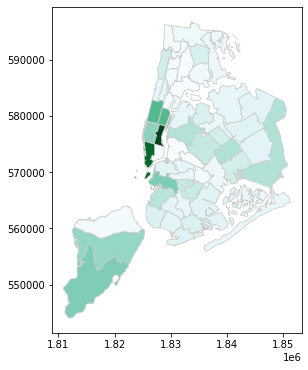

In [53]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'AVGINC'
# set the range for the choropleth
vmin, vmax = 7000, 27000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
gnyc_09.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>